In [62]:
#FACIAL LANDMARKS

In [63]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
 
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [65]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
 
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
 
    # return the list of (x, y)-coordinates
    return coords

In [66]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/home/tejas/Desktop/CV/shape_predictor_68_face_landmarks.dat')

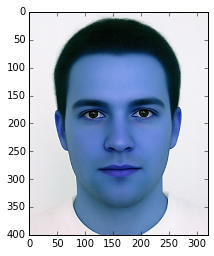

In [67]:
img = cv2.imread('face.jpg')

plt.imshow(img)

In [68]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image

#The first parameter to the detector  is our grayscale image (although this 
#method can work with color images as well).
#The second parameter is the number of image pyramid layers to apply when 
#upscaling the image prior to applying the detector (this it the equivalent 
#of computing cv2.pyrUp N number of times on the image).
rects = detector(img_gray, 1)

In [69]:
rects

rectangles[[(43, 118) (266, 341)]]

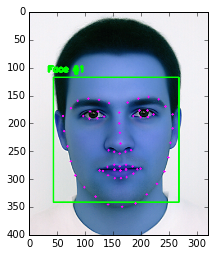

In [73]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(img_gray, rect)
    shape = face_utils.shape_to_np(shape)
 
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
    # show the face number
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 3)
 
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (255, 0, 255), -1)
 
# show the output image with the face detections + facial landmarks
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img)

In [58]:
len(shape)

68